In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [2]:
data_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
data_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [4]:
data_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3000,31
1,tt10384606,8.9000,559
2,tt1042974,6.4000,20
3,tt1043726,4.2000,50352
4,tt1060240,6.5000,21


In [5]:
data_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [6]:
data_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0000,"Comedy,Drama,Fantasy"


In [7]:
## Merged imdb.title.basics.csv.gz and imdb.title.ratings.csv.gz on the column 'tconst' with an inner join to eliminate 
## non-matching items.
data_title_overall = pd.merge(data_title_basics, data_title_ratings, on='tconst', how='inner')

In [8]:
## Renamed 'primary_title' to 'title' in order to smoothly merge this dataframe with bom.movie_gross.csv.gz.
data_title_overall = data_title_overall.rename(columns={'primary_title': 'title'})

In [9]:
## Merged IMDB and BOM data into one dataframe
movie_titles = pd.merge(data_movie_gross, data_title_overall, on='title', how='inner')

In [10]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3024 non-null   object 
 2   domestic_gross   3005 non-null   float64
 3   foreign_gross    1832 non-null   object 
 4   year             3027 non-null   int64  
 5   tconst           3027 non-null   object 
 6   original_title   3027 non-null   object 
 7   start_year       3027 non-null   int64  
 8   runtime_minutes  2980 non-null   float64
 9   genres           3020 non-null   object 
 10  averagerating    3027 non-null   float64
 11  numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [11]:
movie_titles = movie_titles[['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'genres', 'averagerating']]

In [12]:
movie_titles.dropna(axis=0, how='any', inplace=True)

In [13]:
movie_titles['foreign_gross'] = movie_titles.foreign_gross.str.split(',').str.join('').astype(float)

In [14]:
movie_titles['total_gross'] = movie_titles['domestic_gross'] + movie_titles['foreign_gross']

In [15]:
movie_titles.head()

,title,studio,domestic_gross,foreign_gross,year,genres,averagerating,total_gross
0,Toy Story 3,BV,415000000.0000,652000000.0000,2010,"Adventure,Animation,Comedy",8.3000,1067000000.0000
1,Inception,WB,292600000.0000,535700000.0000,2010,"Action,Adventure,Sci-Fi",8.8000,828300000.0000
2,Shrek Forever After,P/DW,238700000.0000,513900000.0000,2010,"Adventure,Animation,Comedy",6.3000,752600000.0000
3,The Twilight Saga: Eclipse,Sum.,300500000.0000,398000000.0000,2010,"Adventure,Drama,Fantasy",5.0000,698500000.0000
4,Iron Man 2,Par.,312400000.0000,311500000.0000,2010,"Action,Adventure,Sci-Fi",7.0000,623900000.0000


In [16]:
movie_titles_genres = movie_titles[['title', 'studio', 'genres', 'total_gross', 'year']]

In [17]:
movie_titles_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 0 to 3001
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1803 non-null   object 
 1   studio       1803 non-null   object 
 2   genres       1803 non-null   object 
 3   total_gross  1803 non-null   float64
 4   year         1803 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 84.5+ KB


In [18]:
movie_titles_genres.tail()

,title,studio,genres,total_gross,year
2927,Bilal: A New Breed of Hero,VE,"Action,Adventure,Animation",2191000.0000,2018
2930,I Still See You,LGF,"Fantasy,Thriller",1501400.0000,2018
2940,The Catcher Was a Spy,IFC,"Biography,Drama,War",954000.0000,2018
2959,Time Freak,Grindstone,"Comedy,Drama,Romance",266000.0000,2018
3001,Antonio Lopez 1970: Sex Fashion & Disco,FM,"Biography,Documentary",73200.0000,2018


In [19]:
def count_genre(x):
    data_plot = movie_titles_genres[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

In [20]:
total_genre_movies = count_genre('genres')
total_genre_movies.head()

Drama        950
Comedy       604
Action       464
Adventure    368
Thriller     292
dtype: int64

Text(0, 0.5, 'Genres')

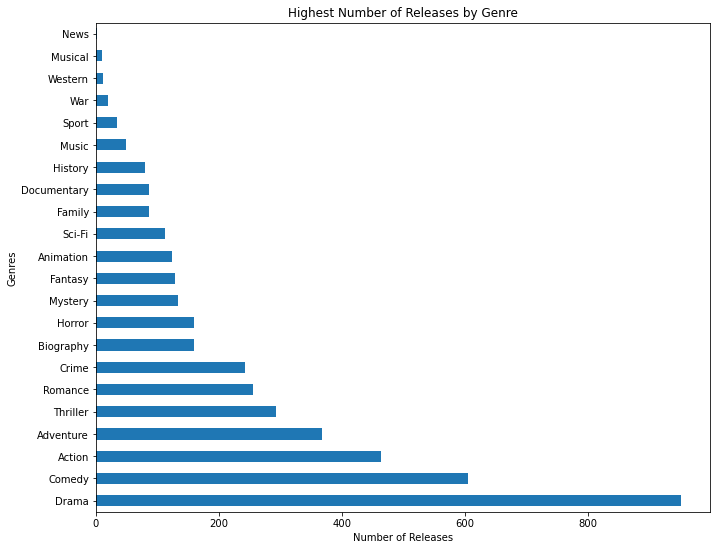

In [21]:
total_genre_movies.plot(kind='barh', figsize=(11,9))
plt.title('Highest Number of Releases by Genre')
plt.xlabel('Number of Releases')
plt.ylabel('Genres')


In [ ]:
##Creates an alphabetized list of genres that are separated

unique_genres = movie_titles_genres.genres.unique()
movie_genres_list = []

for x in unique_genres:
    movie_genres_list.extend(x.split(','))

movie_genres = (list(set(movie_genres_list)))
movie_genres = sorted(movie_genres)

In [ ]:
## Changed variable name of list for clarity
genre_list = movie_genres
genre_list

In [ ]:
genre_details = list(map(str, (movie_titles_genres['genres'])))

year = np.array(movie_titles_genres['year'])
gross = np.array(movie_titles_genres['total_gross'])

In [ ]:
gross_df = pd.DataFrame(index = genre_list, columns=range(2010, 2019))
gross_df = gross_df.fillna(value = 0.0)
z = 0
for i in genre_details:
    split_genre = list(map(str, i.split(',')))
    gross_df.loc[split_genre, year[z]] = gross_df.loc[split_genre, year[z]] + gross[z]
    z+=1

In [32]:
gross_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Action,7955393999.0000,10748326699.0000,9374161398.0000,10629808600.0000,13591266399.0000,11104022782.4000,14004204799.0000,15092285009.0000,13561880369.5000
Adventure,9700117000.0000,10620418600.0000,10911933000.0000,15694927999.0000,13513185499.0000,13161985318.4000,15964495798.0000,15401081798.0000,14350003869.5000
Animation,4163400000.0000,4384255000.0000,3766085400.0000,5189201000.0000,3467677399.0000,3842206699.0000,6431249999.0000,4410045999.0000,3086707000.0000
Biography,922668700.0000,607795100.0000,597432300.0000,1632031500.0000,1536454500.0000,2596172999.0000,1626296600.0000,1287383800.0000,1983846700.0000
Comedy,7801474599.0000,7724342298.0000,8164765100.0000,8178515399.0000,6687035700.0000,9551216099.0000,10382380998.0000,10195539999.0000,7792708100.0000
Crime,1453020899.0000,2567910100.0000,1382405200.0000,3813438800.0000,1998919300.0000,3140732463.0000,1684501000.0000,1596901010.0000,1416246000.0000
Documentary,420259300.0000,1288451500.0000,222236699.0000,124925000.0000,711081800.0000,1094472999.0000,414738600.0000,1275341300.0000,466973200.0000
Drama,6978164899.0000,6691725097.0000,5778801898.0000,8651247299.0000,7899092897.0000,8202848699.0000,7786165100.0000,8719028500.0000,6429736200.0000
Family,2794838300.0000,1503403500.0000,1939200000.0000,563937000.0000,1455601500.0000,2090549000.0000,1220500000.0000,372581300.0000,1794427000.0000
Fantasy,2064816700.0000,2740344000.0000,3360125900.0000,3682723799.0000,1457248000.0000,572100000.0000,3804750000.0000,6325442000.0000,3447159200.0000


<AxesSubplot:>

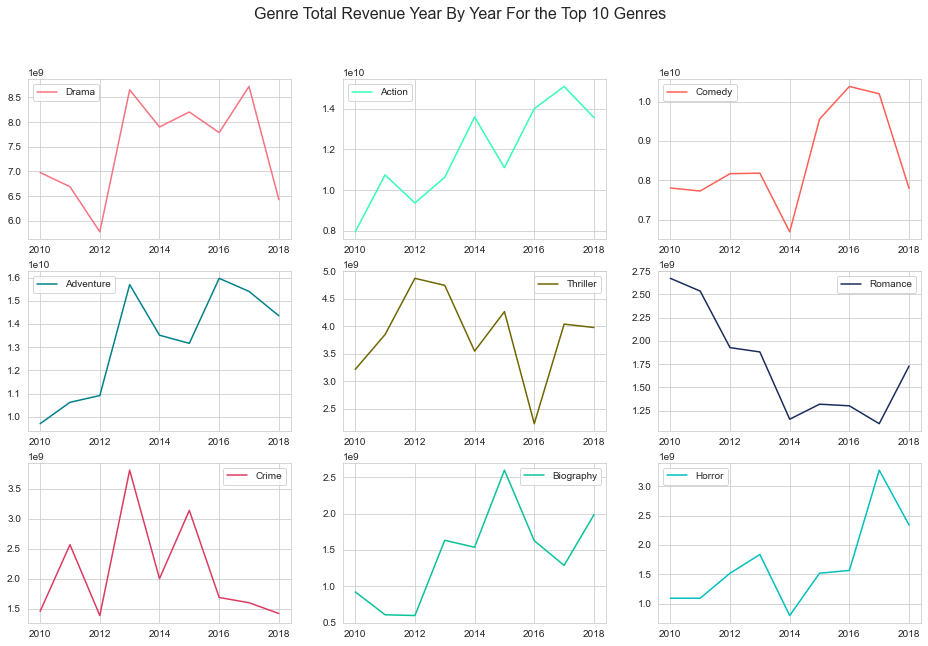

In [35]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Total Revenue Year By Year For the Top 1 Genres',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.
gross_df.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)

#plot the 'Action' genre plot see the popularity difference over year to year.
gross_df.loc['Action'].plot(label = "Action",color='#33FFB5',ax = ax[0][1],legend=True)

#plot the 'Comedy' genre plot see the popularity difference over year to year.
gross_df.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
gross_df.loc['Adventure'].plot(label = "Adventure",color='#00818a',ax = ax[1][0],legend=True)
gross_df.loc['Thriller'].plot(label = "Thriller",color='#6f6600',ax = ax[1][1],legend=True)
gross_df.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
gross_df.loc['Crime'].plot(label = "Crime",color='#db3b61',ax = ax[2][0],legend=True)
gross_df.loc['Biography'].plot(label = "Biography",color='#08c299',ax = ax[2][1],legend=True)
gross_df.loc['Horror'].plot(label = "Horror",color='c',ax = ax[2][2],legend=True)

In [29]:
gross_df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000,22.0000
mean,2512962058.8182,2872111572.2273,2690452240.5455,3434010572.5455,3072521349.6818,3193226024.4182,3419159558.8182,3685259355.6364,3266975241.2955
std,2956661628.4986,3313314569.3157,3224432137.5248,4179135325.6240,4073805088.0261,3871666517.5162,4646763023.9509,4663349886.7941,4084934937.9201
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,333328325.0000,256883600.0000,424297374.5000,268504000.0000,369894525.0000,559132500.0000,452916450.0000,597317250.0000,451714375.0000
50%,1272302849.5000,1759877949.5000,1449717700.0000,1734331750.0000,1456424750.0000,1455093499.5000,1433136900.0000,1364650000.0000,1761465500.0000
75%,3110652949.2500,3857229899.7500,3664595525.0000,5077583550.0000,3527759824.0000,4159534371.2500,4008887475.0000,4317109926.7500,3844301900.0000
max,9700117000.0000,10748326699.0000,10911933000.0000,15694927999.0000,13591266399.0000,13161985318.4000,15964495798.0000,15401081798.0000,14350003869.5000
